# Health Care Project  Predicting Length of Stay

Project By

 Siddhesh Dwarkanath Munagekar : W0747944


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip install pandas-profiling
!pip install -U pandas-profiling
import pandas_profiling 
from pandas_profiling import ProfileReport

from keras.preprocessing.image import load_img
from google.colab import drive
drive.mount('/content/drive')



  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=e4378048c3964ee5988378f3b686bc1c6af7483dedf9400e5a63dafeea4b7c1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gjq8rtya/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.10.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/My Drive/HEALTH_CARE_ANALYTICS/length_of_stay.csv')
data.head(10)
data.Stay.unique()

data 



,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Stay_category,Age_Category
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,5.0,55.5
1,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167,0-10,5.0,55.5
2,13,16,c,3,Z,2,radiotherapy,R,A,3.0,31397,7.0,Emergency,Extreme,2,51-60,5141,0-10,5.0,55.5
3,15,6,a,6,X,4,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,2685,0-10,5.0,75.5
4,16,6,a,6,X,3,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,71-80,9398,0-10,5.0,75.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,317189,26,b,2,Y,2,gynecology,S,D,3.0,63532,8.0,Emergency,Minor,8,21-30,6857,100-110,105.0,25.5
318434,317190,26,b,2,Y,2,gynecology,S,D,3.0,63532,8.0,Emergency,Minor,8,21-30,4594,100-110,105.0,25.5
318435,317433,26,b,2,Y,3,radiotherapy,S,D,1.0,28883,8.0,Urgent,Extreme,6,61-70,3834,100-110,105.0,65.5
318436,318278,26,b,2,Y,3,anesthesia,S,D,4.0,66306,2.0,Urgent,Minor,5,41-50,4306,100-110,105.0,45.5


# Exploratory Data Analysis

In [ ]:
pandas_profiling.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

**Note :**If Pandas profiling fails to open try restaring runtime or choose option restart and run all

In [ ]:
##data.shape
data['Stay_category'].unique()

data['Stay_category'].dtypes


data.dtypes

case_id                    int64
Hospital_code              int64
Hospital_type_code        object
City_Code_Hospital         int64
Hospital_region_code      object
Available_Extra_Rooms      int64
Department                object
Ward_Type                 object
Ward_Facility_Code        object
Bed_Grade                float64
patientid                  int64
City_Code_Patient        float64
Type_of_Admission         object
Severity_of_Illness       object
Visitors_with_Patient      int64
Age                       object
Admission_Deposit          int64
Stay                      object
Stay_category            float64
Age_Category             float64
dtype: object

In [ ]:

data['Stay_category'].unique()

data[data['Stay_category']>35.5].count()

#data.count()

case_id                  74045
Hospital_code            74045
Hospital_type_code       74045
City_Code_Hospital       74045
Hospital_region_code     74045
Available_Extra_Rooms    74045
Department               74045
Ward_Type                74045
Ward_Facility_Code       74045
Bed_Grade                74012
patientid                74045
City_Code_Patient        72853
Type_of_Admission        74045
Severity_of_Illness      74045
Visitors_with_Patient    74045
Age                      74045
Admission_Deposit        74045
Stay                     74045
Stay_category            74045
Age_Category             74045
dtype: int64

##Label Encoding for severity_of_Illness and Type of Admission



In [ ]:
illness_map={'Extreme':3,
             'Moderate':2,
             'Minor':1}

admission_map={'Emergency':1,
               'Urgent':2,
               'Trauma':5}
data['Severity_of_Illness_ordinal']=data.Severity_of_Illness.map(illness_map)
data['Type_of_Admission_code']=data.Type_of_Admission.map(admission_map)


In [ ]:
data.drop(['Stay','Age'],axis=1)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Admission_Deposit,Stay_category,Age_Category,Severity_of_Illness_ordinal,Type_of_Admission_code
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,4911,5.0,55.5,3,1
1,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,6167,5.0,55.5,3,1
2,13,16,c,3,Z,2,radiotherapy,R,A,3.0,31397,7.0,Emergency,Extreme,2,5141,5.0,55.5,3,1
3,15,6,a,6,X,4,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,2685,5.0,75.5,3,1
4,16,6,a,6,X,3,gynecology,Q,F,3.0,63418,8.0,Emergency,Extreme,2,9398,5.0,75.5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,317189,26,b,2,Y,2,gynecology,S,D,3.0,63532,8.0,Emergency,Minor,8,6857,105.0,25.5,1,1
318434,317190,26,b,2,Y,2,gynecology,S,D,3.0,63532,8.0,Emergency,Minor,8,4594,105.0,25.5,1,1
318435,317433,26,b,2,Y,3,radiotherapy,S,D,1.0,28883,8.0,Urgent,Extreme,6,3834,105.0,65.5,3,2
318436,318278,26,b,2,Y,3,anesthesia,S,D,4.0,66306,2.0,Urgent,Minor,5,4306,105.0,45.5,1,2


In [ ]:
print(data['Department'].unique())
data.isnull().sum()

['radiotherapy' 'gynecology' 'TB & Chest disease' 'anesthesia' 'surgery']


case_id                           0
Hospital_code                     0
Hospital_type_code                0
City_Code_Hospital                0
Hospital_region_code              0
Available_Extra_Rooms             0
Department                        0
Ward_Type                         0
Ward_Facility_Code                0
Bed_Grade                       113
patientid                         0
City_Code_Patient              4532
Type_of_Admission                 0
Severity_of_Illness               0
Visitors_with_Patient             0
Age                               0
Admission_Deposit                 0
Stay                              0
Stay_category                     0
Age_Category                      0
Severity_of_Illness_ordinal       0
Type_of_Admission_code            0
dtype: int64

# Filling up missing Values in Bedgrade column by analysing the relation

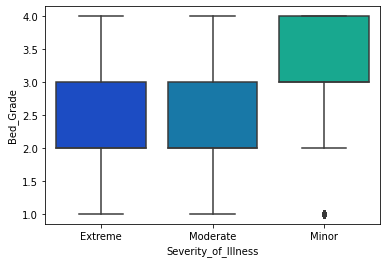

In [ ]:
import seaborn as sns
sns.boxplot(x='Severity_of_Illness',y='Bed_Grade',data=data,palette='winter')


In [ ]:
#Filling missing values in bed grade column
def impute_bed_grade(cols):
  Bed_Grade=cols[0]
  Severity_of_Illness_ordinal=cols[1]

  if pd.isnull(Bed_Grade):

    if Severity_of_Illness_ordinal ==1:
      return 3.5
    elif Severity_of_Illness_ordinal ==2:
      return 2.5
    else:
      return 2.5

  else:
    return Bed_Grade


In [ ]:
data['Bed_Grade']=data[['Bed_Grade','Severity_of_Illness_ordinal']].apply(impute_bed_grade,axis=1)


np.median(data['City_Code_Patient'])

nan

# Filling up the missing data for City code Patient

Text(0.5, 1.0, 'Right Skewed Histogram of City_Code_Patient')

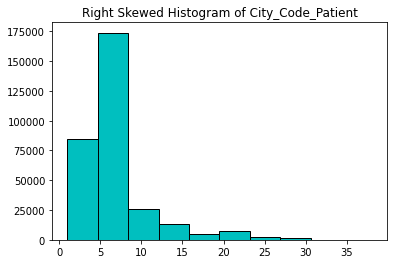

In [ ]:
plt.hist(data['City_Code_Patient'],color='c',edgecolor='black')
plt.title("Right Skewed Histogram of City_Code_Patient")


In [ ]:
data['City_Code_Patient']= np.where(data['City_Code_Patient'].isna(),0.0,data['City_Code_Patient'])

# Histogram of Stay Category

Text(0.5, 1.0, 'Right Skewed Histogram of Stay Category')

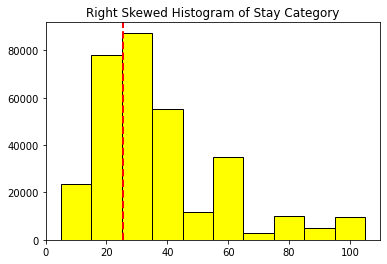

In [ ]:
plt.hist(data['Stay_category'],color='yellow',edgecolor='black')
plt.axvline(x=np.median(data['Stay_category']), color='r', linestyle='dashed', linewidth=2)
plt.title("Right Skewed Histogram of Stay Category")
#data['Stay_category']

The Stay Category distribution being rightskewd with meadian being the measure of central tendency.

# Splitting the response variable into two categories

In [ ]:
#Create a new column Stay Split
data['Stay_split']=""

####createing a function to split Stay in two categories
def imputer_stay_split(cols):
  Stay_split=cols[0]
  Stay_category=cols[1]

  if Stay_category <= 35.5:
    return 0
  else:
    return 1

data['Stay_split']=data[['Stay_split','Stay_category']].apply(imputer_stay_split,axis=1)

#Converting Stay_Split to categorical datatype
data['Stay_split']=data['Stay_split'].astype('category')
type(data[['Stay_split']])

pandas.core.frame.DataFrame

# Splitting the data into Dependent feature and Independent features


In [ ]:
from sklearn.model_selection import train_test_split
X=data[['Department','Available_Extra_Rooms','Bed_Grade','patientid','Visitors_with_Patient','Admission_Deposit','Age_Category','Severity_of_Illness_ordinal',
        'Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']]
y=data[['Stay_split']]
print(X.shape)
print(y.shape)
X['Department'].unique()
y['Stay_split'].dtype

(318438, 12)
(318438, 1)


CategoricalDtype(categories=[0, 1], ordered=False)

# Corelation Plot with Stay Category

In [ ]:
#X.corrwith(data.Stay_split).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   #fontsize = 15, rot = 45, grid = True)
X=X.drop(['patientid'],axis=1)
X

,Department,Available_Extra_Rooms,Bed_Grade,Visitors_with_Patient,Admission_Deposit,Age_Category,Severity_of_Illness_ordinal,Type_of_Admission_code,Hospital_code,City_Code_Patient,City_Code_Hospital
0,radiotherapy,3,2.0,2,4911,55.5,3,1,8,7.0,3
1,radiotherapy,1,3.0,2,6167,55.5,3,1,32,7.0,9
2,radiotherapy,2,3.0,2,5141,55.5,3,1,16,7.0,3
3,gynecology,4,3.0,2,2685,75.5,3,1,6,8.0,6
4,gynecology,3,3.0,2,9398,75.5,3,1,6,8.0,6
...,...,...,...,...,...,...,...,...,...,...,...
318433,gynecology,2,3.0,8,6857,25.5,1,1,26,8.0,2
318434,gynecology,2,3.0,8,4594,25.5,1,1,26,8.0,2
318435,radiotherapy,3,1.0,6,3834,65.5,3,2,26,8.0,2
318436,anesthesia,3,4.0,5,4306,45.5,1,2,26,2.0,2


# One Hot encoding Department Column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])]  ,remainder='passthrough')
data=np.array(ct.fit_transform(X))
data
data =pd.DataFrame(data)
data
X_features= data.drop([0],axis='columns')  #  Deleting first column to avoid dummy variable trap
X_features
X_features.columns=['Department_1','Department_2','Department_3','Department_4','Available_Extra_Rooms','Bed_Grade','Visitors_with_Patient','Admission_Deposit','Age_Category',
                   'Severity_of_Illness_ordinal','Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']
X_features.head()

,Department_1,Department_2,Department_3,Department_4,Available_Extra_Rooms,Bed_Grade,Visitors_with_Patient,Admission_Deposit,Age_Category,Severity_of_Illness_ordinal,Type_of_Admission_code,Hospital_code,City_Code_Patient,City_Code_Hospital
0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,4911.0,55.5,3.0,1.0,8.0,7.0,3.0
1,0.0,0.0,1.0,0.0,1.0,3.0,2.0,6167.0,55.5,3.0,1.0,32.0,7.0,9.0
2,0.0,0.0,1.0,0.0,2.0,3.0,2.0,5141.0,55.5,3.0,1.0,16.0,7.0,3.0
3,0.0,1.0,0.0,0.0,4.0,3.0,2.0,2685.0,75.5,3.0,1.0,6.0,8.0,6.0
4,0.0,1.0,0.0,0.0,3.0,3.0,2.0,9398.0,75.5,3.0,1.0,6.0,8.0,6.0


# Standardizing Predictors by scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_features)

scaled_features=scaler.transform(X_features)
X_features=pd.DataFrame(scaled_features)

#pd.get_dummies(X['Department'])
X_features.columns=['Department_1','Department_2','Department_3','Department_4','Available_Extra_Rooms','Bed_Grade','Visitors_with_Patient','Admission_Deposit','Age_Category',
                   'Severity_of_Illness_ordinal','Type_of_Admission_code','Hospital_code','City_Code_Patient','City_Code_Hospital']
X_features.head(5)


,Department_1,Department_2,Department_3,Department_4,Available_Extra_Rooms,Bed_Grade,Visitors_with_Patient,Admission_Deposit,Age_Category,Severity_of_Illness_ordinal,Type_of_Admission_code,Hospital_code,City_Code_Patient,City_Code_Hospital
0,-0.320416,-1.902171,3.188572,-0.061529,-0.169177,-0.716856,-0.727923,0.027835,67.524275,1.646648,-1.097663,-1.195176,-0.031040,-0.571055
1,-0.320416,-1.902171,3.188572,-0.061529,-1.881257,0.428590,-0.727923,1.183549,67.524275,1.646648,-1.097663,1.584615,-0.031040,1.362850
2,-0.320416,-1.902171,3.188572,-0.061529,-1.025217,0.428590,-0.727923,0.239471,67.524275,1.646648,-1.097663,-0.268579,-0.031040,-0.571055
3,-0.320416,0.525715,-0.313620,-0.061529,0.686863,0.428590,-0.727923,-2.020428,101.292481,1.646648,-1.097663,-1.426825,0.177771,0.395897
4,-0.320416,0.525715,-0.313620,-0.061529,-0.169177,0.428590,-0.727923,4.156566,101.292481,1.646648,-1.097663,-1.426825,0.177771,0.395897


In [ ]:
cols    = [i for i in X_features.columns ]
X_features[cols]
y['Stay_split'].shape

(318438,)

# Splitting Data set into Training set and  Testing set

In [ ]:

#X_features=np.array(X_features)
#y=np.array(y)
#y=y.flatten()
X_train, X_test, y_train, y_test=train_test_split(X_features[cols],y['Stay_split'],test_size=0.2)

X_train.shape


type(X_features)
X_train.shape

(254750, 14)

# DecisionTreeClassifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
deci_tree =DecisionTreeClassifier()
deci_tree.fit(X_train,y_train)
deci_tree_test_score=deci_tree.score(X_test,y_test)
print("Decision Tree test Score",deci_tree_test_score)

Decision Tree test Score 0.7506908679814094


# RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
random_forest_clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
random_forest_clf.fit(X_train,y_train)
random_frst_test_score=random_forest_clf.score(X_test,y_test)
random_frst_test_score
print("Random forest Test Score ",random_frst_test_score)

Random forest Test Score  0.8151457103378973


In [ ]:
#from sklearn.svm import SVR
#from sklearn.multiclass import OneVsRestClassifier
#svr=SVR()
#ovr = OneVsRestClassifier(svc)
#svr.fit(X_train, y_train)
#ovr.score(X_test,y_test)

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000,solver='liblinear')

model.fit(X_train, y_train)
log_reg_test=model.score(X_test,y_test)
print("Logistics Reg Test Score ",log_reg_test)

Logistics Reg Test Score  0.8210337897249089


# eXtreme Gradient Boosting (XGB)

---



In [ ]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1000,objective='binary:logistic',max_depth=3)
xgb_clf.fit(X_train,y_train)
test_score=xgb_clf.score(X_test,y_test)
train_score=xgb_clf.score(X_train,y_train)
print("Test score is",test_score," and Train score is ",train_score)

KeyboardInterrupt: ignored

In [ ]:
# Predicting the Test set results
y_pred=xgb_clf.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred)
cm
# Create a Comfusion matrix visually
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

# Evaluate the results
# Print the accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score,recall_score,accuracy_score ,f1_score
print("Precision Score of XGB Classifier is",precision_score(y_test,y_pred))
print("Recall_score Score  of XGB Classifier is",recall_score(y_test,y_pred))
print("Accuracy Score of XGB Classifier is",accuracy_score(y_test,y_pred))
print("F1_score Score of XGB Classifier is",f1_score(y_test,y_pred))

# Feature Engineering

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(xgb_clf, 10)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

In [ ]:
#Visualize the important features.
xgb.plot_importance(xgb_clf)

In [ ]:
# Build the model again after Feature Selection

xgb_clf=xgb.XGBClassifier(learning_rate=0.01,n_estimators=1000,objective='binary:logistic',max_depth=3)
xgb_clf.fit(X_train[X_train.columns[rfe.support_]],y_train)

xgb_test_score=xgb_clf.score(X_test[X_test.columns[rfe.support_]], y_test)
train_score=xgb_clf.score(X_train[X_train.columns[rfe.support_]], y_train)

print("Test score after best feature selection is",xgb_test_score," and Train score after best feature selection is ",train_score)

# K Fold Cross Validation

In [ ]:
# K-fold Cross validation to different subsets of the training tests model works on every subset with 10 cv
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

xgb_clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=1000,objective='binary:logistic',max_depth=5)

kfold = StratifiedKFold(n_splits=10, shuffle=True)

model_dict={'random_frst':RandomForestClassifier(n_estimators=100),'log_reg':LogisticRegression(max_iter=1000,solver='liblinear'),'xgb_clf':xgb_clf}
table=[]

for key,value in model_dict.items():
    accuracies = cross_val_score(estimator = value, X= X_train, y = y_train, cv = kfold)
    print("Accuracy of ",key,"is",accuracies)
    print("Kfold Accuracy on model :",key ,"is  %.2f%% " % (np.mean(accuracies)*100))
    table.append([key,(np.mean(accuracies)*100)])
    
    print("")

In [ ]:
table
df_table=pd.DataFrame(table,columns=['Model','K-fold Accuracy'],index=[1,2,3])
df_table=df_table.sort_values(by=['K-fold Accuracy'],ascending=False)
#df_table

In [ ]:
#Comparision of Kfold accuracy and normal accuracy with top 3 performing models
accuracy=[random_frst_test_score *100,log_reg_test *100,xgb_test_score *100]
accuracy=pd.DataFrame(accuracy,index=[1,2,3])

accuracy.columns=['Accuracy without Kfold']
accuracy=accuracy.sort_values(by=['Accuracy without Kfold'],ascending=False)
frame=[df_table,accuracy]
acc_table=pd.concat(frame,axis=1)
acc_table

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def build_model():
  model = Sequential()
  model.add(Dense(1024, input_dim=(14), activation='relu'))
  model.add(Dense(156,  activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model



In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


estimator = KerasClassifier(build_fn=build_model, epochs=30, batch_size=1000, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Keras Tuner

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

def build_model(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('dense_1_units', min_value=12, max_value=256, step=16), input_dim=(14), activation='relu'))
  model.add(Dense(units=hp.Int('dense_2_units', min_value=64, max_value=256, step=16),  activation='relu'))
  model.add(Dense(units=hp.Int('dense_3_units', min_value=12, max_value=256, step=16),  activation='relu'))
  model.add(Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                
                step=0.05)))
  model.add(Dense(units=hp.Int('dense_4_units', min_value=12, max_value=256, step=16),  activation='relu'))
  model.add(Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                
                step=0.05)))
            

  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(hp.Choice('learning_rate', values=[1e-2, 1e-3])), metrics=['accuracy'])
  return model



In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search1=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3,
                          directory='output109',
                          project_name="Project_HL_")


tuner_search1.search(X_features,y,epochs=3,validation_split=0.1)

In [ ]:
#Picking up the best model from the trail
model=tuner_search1.get_best_models(num_models=1)[0]
model.summary()

In [ ]:
#Early Stopping is used to stop  training when a monitored metric has stopped improving
#from tensorflow.keras.callbacks import EarlyStopping
#early_stop=EarlyStopping(monitor='val_loss',patience=2)

#####Fitting The Model##################


model1 =model.fit(X_features, y,batch_size=96, epochs = 30, validation_split=0.1)

In [ ]:
metrics=pd.DataFrame(model1.history)
metrics